In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from xml.etree import ElementTree
import pandas as pd

In [2]:
path = 'images/val/images/'
data = pd.read_csv('feature_values.csv')
images = data['filename'].tolist()

The object takes up 66.074% of the image
The Area by Perimeter value is 87.989
The Aspect Ratio of the main object is 0.978


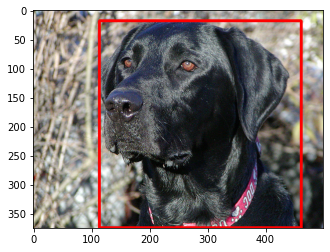

The object takes up 28.426% of the image
The Area by Perimeter value is 54.275
The Aspect Ratio of the main object is 2.031


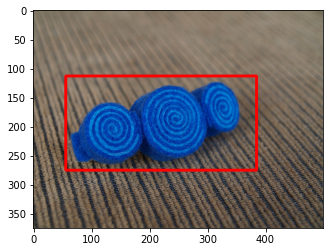

The object takes up 17.778% of the image
The Area by Perimeter value is 45.652
The Aspect Ratio of the main object is 1.19


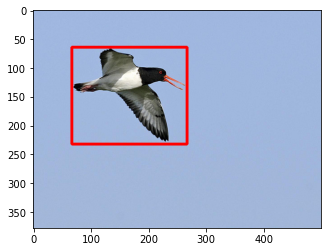

The object takes up 14.667% of the image
The Area by Perimeter value is 39.855
The Aspect Ratio of the main object is 1.76


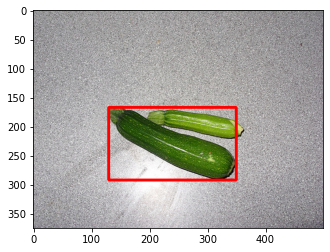

The object takes up 73.692% of the image
The Area by Perimeter value is 24.75
The Aspect Ratio of the main object is 1.0


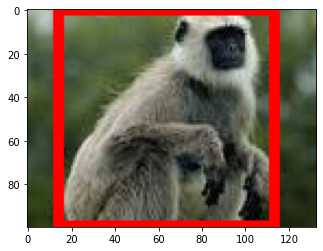

The object takes up 33.777% of the image
The Area by Perimeter value is 62.458
The Aspect Ratio of the main object is 1.274


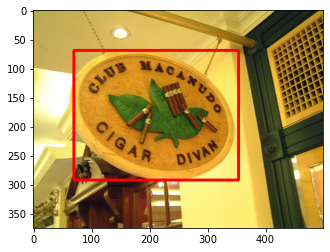

The object takes up 49.29% of the image
The Area by Perimeter value is 71.722
The Aspect Ratio of the main object is 0.499


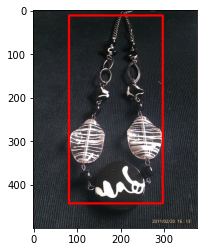

The object takes up 99.202% of the image
The Area by Perimeter value is 124.5
The Aspect Ratio of the main object is 1.0


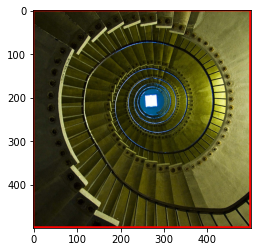

In [3]:
import matplotlib.image as mpimg

xml_directory = "images/val/xml"

for x in [374, 476, 547, 553, 2476, 560, 565, 583]:
    file_path = xml_directory + '/' + images[x][:-5] + '.xml'
    filename = path + images[x]
    tree = ElementTree.parse(file_path)
    root = tree.getroot()
    x_min = int(root.find("object/bndbox/xmin").text)
    x_max = int(root.find("object/bndbox/xmax").text)
    y_min = int(root.find("object/bndbox/ymin").text)
    y_max = int(root.find("object/bndbox/ymax").text)

    img = mpimg.imread(filename)

    width = x_max - x_min
    height = y_max - y_min
    obj = width*height
    image = img.shape[0] * img.shape[1]
    print('The object takes up {}% of the image'.format(round(obj*100/image, 3)))
    print('The Area by Perimeter value is {}'.format(round((width*height)/(2*(width+height)), 3)))
    print('The Aspect Ratio of the main object is {}'.format(round(width/height, 3)))
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max),(255, 0, 0),3)
    plt.imshow(img)
    plt.show()
    
    